In [1]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('spam.csv', encoding_errors='ignore')

In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5179,ham,"Hi hope u r both ok, he said he would text and...",NaN,NaN,NaN
1592,ham,Will it help if we propose going back again to...,NaN,NaN,NaN
2846,spam,Free-message: Jamster!Get the crazy frog sound...,NaN,NaN,NaN
3414,ham,He remains a bro amongst bros,NaN,NaN,NaN
3898,ham,mean it's confirmed... I tot they juz say oni...,NaN,NaN,NaN


In [17]:
df.shape

(5572, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [40]:
# 1. Cleaning Data
## Removed the unwanted columns by drop function with inplace as True
df.sample(5)

,Target,Text
1295,0,TELL HER I SAID EAT SHIT.
4785,0,Holy living christ what is taking you so long
4513,0,"Sure, whenever you show the fuck up &gt;:("
1335,0,"Sometimes we put walls around our hearts,not j..."
4110,1,URGENT! Your Mobile number has been awarded a ...


In [21]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)    

In [23]:
df.sample(5)

,Target,Text
2968,ham,Ma head dey swell oh. Thanks for making my day
2871,ham,See you there!
2553,ham,give me some time to walk there.
5381,spam,You have 1 new message. Call 0207-083-6089
3815,ham,How long does it take to get it.


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
df['Target'] = encoder.fit_transform(df['Target'])

In [31]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
## checking for null values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [42]:
#checking for duplicate values
df.duplicated().sum()

404

In [45]:
# removing duplicate values
df = df.drop_duplicates(keep = 'first')

In [47]:
df.duplicated().sum()

0

In [49]:
df.shape

(5168, 2)

In [52]:
#EDA
df['Target'].value_counts()

0    4516
1     652
Name: Target, dtype: int64

In [53]:
import matplotlib.pyplot as plt

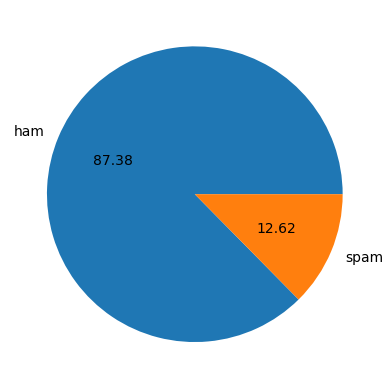

In [56]:
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'],autopct="%0.2f")
plt.show()

In [57]:
import nltk

In [59]:
!pip install nltk

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
df['nums_characters'] = df['Text'].apply(len)

In [64]:
df.head()

,Target,Text,nums_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [67]:
df['nums_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [68]:
df.head()

,Target,Text,nums_characters,nums_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [73]:
df['nums_sentence'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [74]:
df.head()

,Target,Text,nums_characters,nums_words,nums_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
